# Introduction
<br>
Name | Abid Ilmun Fisabil<br>
Batch | 006<br>
Phase | 1

# Data Loading (Regression Case)

In [283]:
import pandas as pd
import sklearn as skl
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import ExtraTreeRegressor, ExtraTreeClassifier
from xgboost import XGBRegressor, XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [284]:
df = pd.read_csv('../input/insurance/insurance.csv')

In [285]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [286]:
df.shape

(1338, 7)

In [287]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [288]:
for i in df.dtypes[df.dtypes == object].index:
    print(df[i].unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


***from initial inspection, im able to conlude as follows***:
- <code>the dataset contains 1338 observations with 7 features</code>
- <code>no missing values detected in the data</code>
- <code>categorical features have consistent values</code>

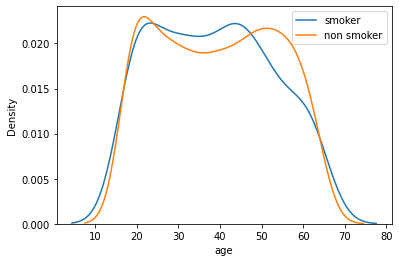

In [289]:
sns.kdeplot(df[df.smoker == 'yes'].age,label = 'smoker')
sns.kdeplot(df[df.smoker == 'no'].age, label = 'non smoker')
plt.legend();

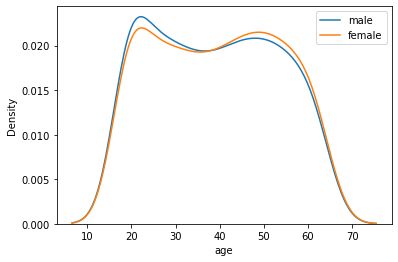

In [290]:
sns.kdeplot(df[df.sex == 'male'].age,label = 'male')
sns.kdeplot(df[df.sex == 'female'].age, label = 'female')
plt.legend();

## Data Preprocessing

In [291]:
obj_cols = df.dtypes[df.dtypes == object].index
num_cols = df.dtypes[df.dtypes != object].index

In [292]:
df_obj = pd.get_dummies(df[obj_cols])

In [293]:
for i in num_cols:
    print(i,'   ',st.normaltest(df[i]).pvalue)

age     0.0
bmi     0.0001521377897266011
children     8.457892706503516e-33
charges     7.019807901276197e-74


In [294]:
for i in num_cols:
    print(i,'   ',st.shapiro(df[i]).pvalue)

age     5.687479624670986e-22
bmi     2.609841976664029e-05
children     5.066361280494088e-36
charges     1.150477698013898e-36


**Normality Test on Numerical Columns**<br>
*all of our numerical features are not normal as the conclusion from two tests, namely D'Agustino and Pearson as well as Shapiro*

In [295]:
pd.DataFrame(df[num_cols].skew(),columns = ['original'])

,original
age,0.055673
bmi,0.284047
children,0.938380
charges,1.515880


In [296]:
pd.DataFrame(np.log1p(df[num_cols]).skew(),columns = ['log1p'])

,log1p
age,-0.361068
bmi,-0.238240
children,0.264083
charges,-0.089817


In [297]:
dfbc = df[num_cols]

In [298]:
for i in num_cols:
    dfbc[i] = st.boxcox(dfbc[i]+1)[0]

In [299]:
pd.DataFrame(df[num_cols].skew(), columns = ['original'])

,original
age,0.055673
bmi,0.284047
children,0.938380
charges,1.515880


In [300]:
pd.DataFrame(dfbc.skew(), columns = ['boxcox(+1)'])

,boxcox(+1)
age,-0.100193
bmi,-0.006617
children,0.105254
charges,-0.008709


**Conclusions on Normality Handling Method**<br>
i finalize below fetures to be transformed using boxcox as it gives the least skewness
- <code>bmi</code>
- <code>children</code>
- <code>charges</code>
<br>

<code>age</code> will not be transformed as no transformation technique gives better skewness than its original 

## Building Model

In [301]:
dfbc.age = df.age
data = pd.concat([dfbc,df_obj], axis = 1)

In [302]:
rx = data.copy()
rx.pop('charges')
ry = df.charges

In [303]:
print('--------------------------LinearRegression--------------------------')

#splitting 
rxtrain,rxtest,rytrain,rytest = train_test_split(rx,ry,test_size = 0.2,random_state = 1)
#model initialization
rmodel1 = LinearRegression()
#training model
rmodel1.fit(rxtrain,rytrain)
#predicting validation data
ypred_mod1 = rmodel1.predict(rxtest)
#evaluating model
mae_mod1 = metrics.mean_absolute_error(rytest, ypred_mod1)
mse_mod1 = metrics.mean_squared_error(rytest, ypred_mod1)
r2_mod1 = metrics.r2_score(rytest, ypred_mod1)
print(f"""
    R2  = {r2_mod1}
    MAE = {mae_mod1}
    MSE = {mse_mod1}
""")

print('--------------------------XGBRegressor--------------------------')

#splitting 
rxtrain,rxtest,rytrain,rytest = train_test_split(rx,ry,test_size = 0.2,random_state = 1)
#model initialization
rmodel2 = XGBRegressor(random_state = 1)
#training model
rmodel2.fit(rxtrain,rytrain)
#predicting validation data
ypred_mod2 = rmodel2.predict(rxtest)
mae_mod2 = metrics.mean_absolute_error(rytest, ypred_mod2)
mse_mod2 = metrics.mean_squared_error(rytest, ypred_mod2)
r2_mod2 = metrics.r2_score(rytest, ypred_mod2)
print(f"""
    R2  = {r2_mod2}
    MAE = {mae_mod2}
    MSE = {mse_mod2}
""")
print('--------------------------ExtraTreeRegressor--------------------------')

#splitting 
rxtrain,rxtest,rytrain,rytest = train_test_split(x,y,test_size = 0.2,random_state = 1)
#model initialization
rmodel3 = ExtraTreeRegressor(random_state = 1)
#training model
rmodel3.fit(rxtrain,rytrain)
#predicting validation data
ypred_mod3 = rmodel3.predict(rxtest)
#evaluating model
mae_mod3 = metrics.mean_absolute_error(rytest, ypred_mod3)
mse_mod3 = metrics.mean_squared_error(rytest, ypred_mod3)
r2_mod3 = metrics.r2_score(rytest, ypred_mod3)
print(f"""
    R2  = {r2_mod3}
    MAE = {mae_mod3}
    MSE = {mse_mod3}
""")

--------------------------LinearRegression--------------------------

    R2  = 0.763512062458657
    MAE = 4096.573511926598
    MSE = 35303070.576258294

--------------------------XGBRegressor--------------------------

    R2  = 0.80762858643341
    MAE = 3097.5110608333575
    MSE = 28717327.659930386

--------------------------ExtraTreeRegressor--------------------------

    R2  = 0.5082494018849091
    MAE = 0.05513548821282239
    MSE = 0.05513548821282239



# Data Loading (Classification Case)

In [304]:
df = pd.read_csv('../input/galaxy-classification/Barchi19_Morph-catalog_670k-galaxies/Barchi19_Morph-catalog_670k-galaxies.csv')

In [305]:
df = df[['C','A','S','G2','H','ML2classes']]

In [306]:
df.head()

,C,A,S,G2,H,ML2classes
0,0.329970,0.773113,0.845577,1.741071,0.828695,1
1,0.385649,0.614753,0.827377,1.604379,0.743405,1
2,0.322301,0.861787,0.934300,1.511484,0.740404,1
3,0.338940,0.777340,0.881642,1.539079,0.740161,1
4,0.330124,0.762131,0.910175,1.102738,0.654903,1


In [307]:
df.shape

(670560, 6)

In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670560 entries, 0 to 670559
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   C           670560 non-null  float64
 1   A           670560 non-null  float64
 2   S           670560 non-null  float64
 3   G2          670560 non-null  float64
 4   H           670560 non-null  float64
 5   ML2classes  670560 non-null  object 
dtypes: float64(5), object(1)
memory usage: 30.7+ MB


In [309]:
df.ML2classes.unique()

array(['1', '--', 'U', '0'], dtype=object)

In [310]:
df = df[(df['ML2classes'] == '1')| (df['ML2classes'] == '0')]

In [311]:
df.skew()

C               0.386424
A              -2.284678
S            -183.511807
G2             -0.819476
H              -0.657794
ML2classes     -2.225411
dtype: float64

In [312]:
df.describe()

,C,A,S,G2,H
count,505210.000000,505210.000000,505210.000000,505210.000000,505210.000000
mean,0.400206,0.814326,0.471354,1.242737,0.658755
std,0.082255,0.121825,54.492826,0.458173,0.119284
min,0.024179,-0.695074,-9999.990000,0.000000,0.000000
25%,0.336235,0.770024,0.744072,0.945694,0.581192
50%,0.393749,0.847957,0.839339,1.379054,0.666921
75%,0.456673,0.895446,0.884748,1.623762,0.755596
max,0.800752,0.989032,0.978079,1.968042,0.948184


## Data Preprocessing

In [313]:
np.cbrt(df[df.columns[:-1]]).skew()

C      0.057606
A    -11.350860
S    -54.966976
G2    -1.458132
H     -1.478693
dtype: float64

In [314]:
dfyjs = df.copy()
for i in df.columns[:-1]:
    
    dfyjs[i] = st.yeojohnson(df[i])[0]
dfyjs.skew()

C             0.015946
A            -0.251629
S            -0.566018
G2           -0.307437
H            -0.064406
ML2classes   -2.225411
dtype: float64

**brief explanation of what's going on with this dataset**<br>
***Findings***<br>
- no missing values
- however, target feature contains values other than 1 and 0 ('U','--')
- highly skewed features

***Handling***<br>
for uninterpretable target feature values, droppig them would make it easier. as we just want to know which one is elips and wich one is spiral.<br>
as can be seen from the descriptive statistics. all features have the possibility to contain negative numbers. transformation techniques that allow negative values to be present are cuberoot and yeojohnson. 
<br>
and obviously the skewness decreased by a bunch after using yeojohnson. therefore im going to use yeojohnson as data transformation tool

## Buildign Model

In [315]:
cx = dfyjs
cy = dfyjs.pop('ML2classes')
cy = [int(i) for i in cy]

In [316]:
print('--------------------------LogisticRegression--------------------------')

#splitting 
cxtrain,cxtest,cytrain,cytest = train_test_split(cx,cy,test_size = 0.2,random_state = 1)
#model initialization
cmodel1 = LogisticRegression()
#training model
cmodel1.fit(cxtrain,cytrain)
#predicting validation data
ypred_mod1 = cmodel1.predict(cxtest)
#evaluating model
print(metrics.classification_report(cytest,ypred_mod1))

print('--------------------------XGBClassifier--------------------------')

#splitting 
cxtrain,cxtest,cytrain,cytest = train_test_split(cx,cy,test_size = 0.2,random_state = 1)
#model initialization
cmodel2 = XGBClassifier(random_state = 1,eval_metric = 'error')
#training model
cmodel2.fit(cxtrain,cytrain)
#predicting validation data
ypred_mod2 = cmodel2.predict(cxtest)
print(metrics.classification_report(cytest,ypred_mod2))
print('--------------------------ExtraTreeClassifier--------------------------')

#splitting 
cxtrain,cxtest,cytrain,cytest = train_test_split(cx,cy,test_size = 0.2,random_state = 1)
#model initialization
cmodel3 = ExtraTreeClassifier(random_state = 1)
#training model
cmodel3.fit(cxtrain,cytrain)
#predicting validation data
ypred_mod3 = cmodel3.predict(cxtest)
#evaluating model
print(metrics.classification_report(cytest,ypred_mod3))

--------------------------LogisticRegression--------------------------
              precision    recall  f1-score   support

           0       0.79      0.72      0.75     13002
           1       0.96      0.97      0.97     88040

    accuracy                           0.94    101042
   macro avg       0.88      0.85      0.86    101042
weighted avg       0.94      0.94      0.94    101042

--------------------------XGBClassifier--------------------------
              precision    recall  f1-score   support

           0       0.89      0.83      0.86     13002
           1       0.97      0.98      0.98     88040

    accuracy                           0.96    101042
   macro avg       0.93      0.91      0.92    101042
weighted avg       0.96      0.96      0.96    101042

--------------------------ExtraTreeClassifier--------------------------
              precision    recall  f1-score   support

           0       0.77      0.77      0.77     13002
           1       0.97     

***conclusion***
<br>
for classification case, XGB Regressor does better than the rest two. if for the regression case ExtraTreeClassifier gave the worst result, in this case it is giving second best result. judging from the f1 score of each classes. <br>

# Model Inference

## Health Insurance Estimator

In [317]:
rmodel2.predict(rx.sample(1))[0]

4567.949

## Galaxy Identifier

In [318]:
cmodel2.predict(cx.sample(1))[0]

1